# Intro to Plot.ly

In this notebook, we'll run through how to get Plot.ly with Cufflinks running on your machine, and then go through a few examples of plots you can make.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/37/Plotly-logo-01-square.png"></img>

Plot.ly is really cool for a few reasons:
1. All your plots save to your profile page, so when you make them it's really easy to reuse them for presentations and articles and dashboards.
2. The plots are very interactive, unlike matplotlib/seaborn.
3. There's plot types that aren't available in matplotlib

Some drawbacks:
1. With a free account, you only get 50 daily API calls.  When you make or edit a plot, you use one of those 50 calls.  That being said, I've never hit that limit.
2.  With a free account, all your plots are public (you can have one private plot).

# Table of Contents

1. [Examples](#examples)
2. [Installing Plot.ly](#installation)
3. [Plotting the Iris Dataset](#iris)
4. [Cufflinks](#cufflinks)
5. [Geo](#geo)
6. [Free Exploration](#exploring)

<a id="examples"></a>

### Examples

Plotly is awesome.  You can make plots like this:

In [3]:
import plotly.tools as tls
tls.embed('https://plot.ly/~Dreamshot/8698/')

Or this (from my capstone):

In [4]:
import plotly.tools as tls
tls.embed('https://plot.ly/~ebaker12/28')

and this:

In [5]:
import plotly.tools as tls
tls.embed('https://plot.ly/~ebaker12/38')

<a id="installation"></a>

### Installing Plotly

There's a guide you can find here (https://plot.ly/python/getting-started/) , but I'll also outline the steps below:

1. Make a free account for Plot.ly
2. pip install plotly
3. pip install cufflinks
4. Run the code nelow, but using your plotly profile name and API key:

In [ ]:
import plotly
plotly.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')

You'll need to replace 'DemoAccount' and 'lr1c37zw81' with your Plotly username and API key.
Find your API key here. 

The initialization step places a special .plotly/.credentials file in your home directory. Your ~/.plotly/.credentials file should look something like this:

In [ ]:
{
    "username": "DemoAccount",
    "stream_ids": ["ylosqsyet5", "h2ct8btk1s", "oxz4fm883b"],
    "api_key": "lr1c37zw81"
}

<a id="iris"></a>

### Plotting the Iris Dataset

Let's use the Iris Data set to make some simple plots. We'll start off with a 3D scatter plot.

Info on how to do this can be found here: https://plot.ly/python/3d-scatter-plots/

In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import cufflinks # this will allow us to sink directly with pandas, and to show plots inline.
import plotly.plotly as py
import plotly.graph_objs as go

In [9]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
breeds = iris.target

In [11]:
df.columns = [c.replace(" ", "_") for c in df.columns]

In [14]:
x = df['sepal_width_(cm)']
y = df['sepal_length_(cm)']
z = df['petal_width_(cm)']

# In the Graph Objects (go) module, we can pull in different types of charts and set their parameters

# We'll call the Scatter3d class
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=breeds,                # we'll color the points by their breed
        colorscale='Viridis',        # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]

# We can control the way the plot looks with the go.Layout class
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)

# We specify filename for keeping track of the plot on your plotly profile
py.iplot(fig, filename='3d-scatter-iris')

While this is well and good, let's format it better.  I'd like to make it so we can hover over each point and see the breed, and also see what the x, y, and z axes actually are.

In [17]:
# We'll add the names of each axis to the layout to add them to the plot

layout = go.Layout( scene = dict(
                    xaxis = dict(
                        title='sepal_width_(cm)'),
                    yaxis = dict(
                        title='sepal_length_(cm)'),
                    zaxis = dict(
                        title='petal_width_(cm)')),
                    width=700,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10))

In [33]:
# And we can add a "text" field to the trace to see text when we hover over points

# Let's make a dictionary so we can match breed names for the text
target_names_dict = {i: breed for i, breed in enumerate(iris.target_names)}

# Now we'll map those to a list of the breed names
breed_names = [target_names_dict[num] for num in breeds]
text = ['Breed: %s' % breed for breed in breed_names]

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    # Adding text to the graph objects scatter3d class
    text = text,
    marker=dict(
        size=12,
        color=breeds,             
        colorscale='Viridis', 
        opacity=0.8,
    )
)

data=[trace1]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-iris')

<a id="cufflinks"></a>

### Cufflinks

With cufflinks, we can do this straight onto a dataframe, by calling the iplot method.  This works very similar to calling the .plot method on a dataframe.

Here are some examples of the "kind" of charts we can pull this way:

- scatter
- bar
- box
- spread
- ratio
- heatmap
- surface
- histogram
- bubble
- bubble3d
- scatter3d       
- scattergeo
- choroplet 

In [49]:
# Let's make some simple plots using cufflinks and the iris dataet

# We just call the iplot method on our dataframe after importing cufflinks and then specify what kind of graph we
# want

df.iplot(kind='box', filename="cufflinks_boxplot_iris")

In [63]:
# Let's do a bar plot showing different mean values by breed

# with cufflinks we do this almost exactly as how we would with matplotlib

df['breed'] = breed_names

Matplotlib: 

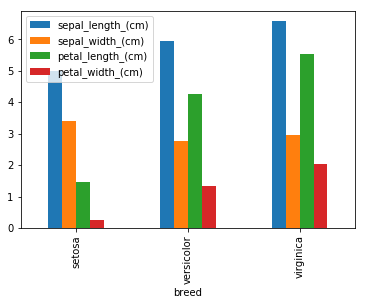

In [64]:
%matplotlib inline

df.groupby('breed').mean().plot(kind='bar')

Plot.ly:

In [65]:
df.groupby('breed').mean().iplot(kind='bar', filename="cufflinks_bar_iris")

There's almost no difference with how we call the graph from matplotlib.  There are many things that we can tweak in the chart, but it looks pretty good often by calling the defaults.

In my experience, you can get more granular control over the appearance of your plots by using the Graph Objects classes as opposed to using cufflinks straight on your dataframe, in the same way that you get more control by calling seaborn and matplotlib objects than by using the .plot method.

<a id="geo"></a>

### Geographic Plotting

Something that I've found plot.ly is great for is mapping.  Let's explore that here and try making some maps.

Resource: https://plot.ly/python/bubble-maps/

In [66]:
# Let's read in some plotly data on populations of cities

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

,name,pop,lat,lon
0,New York,8287238,40.730599,-73.986581
1,Los Angeles,3826423,34.053717,-118.242727
2,Chicago,2705627,41.875555,-87.624421
3,Houston,2129784,29.758938,-95.367697
4,Philadelphia,1539313,39.952335,-75.163789


To do geographic plotting in Plot.ly, you'll need to have latitutde longitude coordinates for your points.  I'll put a csv that maps zipcodes to lat/lon coordinates in the repo for this notebook.

In [68]:
# We'll add a text column to the dataframe that will get used for hover over information
df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'

# Setting up bins to color the bubbles on the plot by population group
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]

colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

# We'll look through the bins and create a new trace for each 
for i, lim in enumerate(limits):
    
    # Creating a sub dataframe that's just the data for this bin
    df_sub = df[lim[0]:lim[1]]
    
    # As opposed to calling a new Graph Object, we can just specify the data in a dictionary
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = dict(
        title = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
<a id="geo"></a>py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )

<a id="exploring"></a>

### Exploring

Do you have any ideas for plots you want to try?  Let's give them a shot!!

In general, I find a good technique is to simply check out the plot.ly docs for examples of different types of plots, and modify the existing code to suit your needs.